In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
research_exp = pd.read_csv(r'C:\Users\danys\Downloads\research_exp.csv', sep='""|,')
number_of_research = pd.read_csv(r'C:\Users\danys\Downloads\researchers.csv', sep='\n|;', decimal=',')
gdp_report = pd.read_csv(r'C:\Users\danys\Downloads\gdp_report.csv', sep='""|,', error_bad_lines=False, warn_bad_lines=False)

C:\Users\danys\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
C:\Users\danys\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\danys\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
gdp_report = gdp_report[['Country Code', 'Indicator Name', '2009', '2010',
                         '2011', '2012', '2013', '2014', '2015', '2016', '2017',
                        '2018', '2019', '2020']]

In [3]:
gdp_report.sort_values('2020', ascending=False).head()

,Country Code,Indicator Name,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
139,MCO,GDP per capita (current US$),154775.380774,150737.892475,169016.196065,157520.219427,177673.745368,189432.370013,165989.505114,170028.655718,167517.059728,185978.609251,189487.147128,173688.189360
135,LUX,GDP per capita (current US$),108987.677592,110777.907929,118869.299910,112591.116203,119966.034889,123514.196686,105419.608507,106826.726449,109921.031444,117197.481694,113218.713350,116014.602497
26,BMU,GDP per capita (current US$),101407.764032,101875.284073,97774.162072,98431.865181,99471.638898,98467.683994,102005.625642,106885.878489,111820.581466,113023.185594,117098.446325,107079.479837
36,CHE,GDP per capita (current US$),72083.167695,77117.126014,91254.034761,86547.670891,88109.486752,89684.707580,84776.142166,83073.280082,83352.088653,86388.404953,85334.519462,87097.036450
104,IRL,GDP per capita (current US$),51927.230963,48607.940516,52108.833230,49028.827394,51518.388103,55525.897251,61987.550998,62818.966365,69601.683882,79068.974612,80886.615739,85267.764744


In [4]:
research_exp.columns

Index(['"LOCATION', 'Unnamed: 1', 'INDICATOR', 'Unnamed: 3', 'Unnamed: 4',
       'SUBJECT', 'Unnamed: 6', 'Unnamed: 7', 'MEASURE', 'Unnamed: 9',
       'Unnamed: 10', 'FREQUENCY', 'Unnamed: 12', 'Unnamed: 13', 'TIME',
       'Unnamed: 15', 'Unnamed: 16', 'Value', 'Unnamed: 18', 'Unnamed: 19',
       'Flag Codes', '"'],
      dtype='object')

In [5]:
research_exp.drop(['Unnamed: 1', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 6', 'Unnamed: 7',
                  'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 15',
                  'Unnamed: 18', 'Unnamed: 19', '"', "Value", "Flag Codes", "SUBJECT", "INDICATOR", "FREQUENCY"], inplace=True, axis=1)

In [6]:
research_exp.rename(columns={'"LOCATION': "LOCATION", 'Unnamed: 16': "VALUE"}, inplace=True)

In [7]:
research_exp['LOCATION'] = research_exp['LOCATION'].map(lambda x: x.lstrip('"'))

In [8]:
research_exp_2015 = research_exp.query('TIME == 2015 & MEASURE == "PC_GDP"')
research_exp.head()

,LOCATION,MEASURE,TIME,VALUE
0,AUS,MLN_USD,1981,3539.743780
1,AUS,MLN_USD,1984,4321.978616
2,AUS,MLN_USD,1986,5310.266678
3,AUS,MLN_USD,1987,5418.261064
4,AUS,MLN_USD,1988,5755.044218


In [9]:
number_of_research['Country Name'] = number_of_research['Country Name'].replace(['Iceland', 'Finland', 'Denmark', 'Singapore', 'Norway', 'Japan', 'Sweden', 'Korea, Rep.', 'Luxembourg', 'Canada', 'Austria', 'United States', 'United Kingdom', 'Taiwan', 'Israel', 'Germany',
                                                                                 'Slovenia', 'Belguim', 'France', 'The Netherlands', 'Australia', 'China', 'Czech Republic',
                                                                                 'Estonia', 'Gibraltar', 'Ireland', 'Hungary', 'Portugal', 'Luxemburg', 'Italy', 'Spain', 'New Zealand', 'Russia',
                                                                                 'Lithuania', 'Poland', 'Slovakia', 'Greece', 'Turkey', 'South Africa', 'Argentina', 'Latvia', 'Mexico', 'Chile', 'Roumania',
                                                                                'Columbia'],
                                                                                ['ISL', 'FIN', 'DNK', 'SGP', 'NOR', 'JPN', 'SWE', 'KOR', 'LUX', 'CAN', 'AUT', 'USA', 'GBR',
                                                                                 'TWN', 'ISR', 'DEU', 'SVN', 'BEL', 'FRA', 'NLD', 'AUS', 'CHN', 'CZE',
                                                                                 'EST', 'GBR', 'IRL', 'HUN', 'PRT', 'LUX', 'ITA', 'ESP', 'NZL', 'RUS', 'LTU', 'POL', 'SVK', 'GRC', 'TUR', 'ZAF',
                                                                                'ARG', 'LVA', 'MEX', 'CHL', 'ROU', 'COL'])

In [10]:
total_data = pd.merge(number_of_research, research_exp, left_on='Country Name', right_on='LOCATION')

In [11]:
total_data.head()
total_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'LOCATION', 'MEASURE', 'TIME',
       'VALUE'],
      dtype='object')

In [12]:
total_data = total_data[['Country Name', '2015', 'VALUE', 'MEASURE', 'TIME']]
total_data = total_data.query('MEASURE == "PC_GDP" & TIME == 2015')
total_data = total_data.dropna()

,Country Name,2015,VALUE,MEASURE,TIME
43,ARG,1230.53948,0.618541,PC_GDP,2015
162,AUT,5019.43848,3.049690,PC_GDP,2015
242,CAN,4523.09283,1.693243,PC_GDP,2015
268,CHL,454.95945,0.380727,PC_GDP,2015
325,CHN,1150.81931,2.057010,PC_GDP,2015


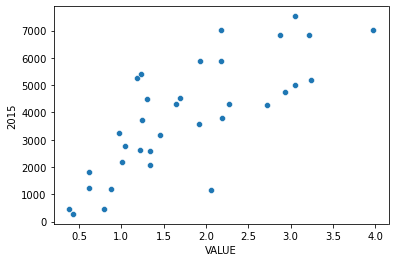

In [33]:
sns.scatterplot(data=total_data, x='VALUE', y='2015')
total_data.head()

In [19]:
X = total_data['2015'].values.reshape(-1, 1)
Y = total_data['VALUE'].values.reshape(-1, 1)

In [44]:
reg = LinearRegression(fit_intercept=True).fit(Y, X)
reg.score(Y, X)
reg.intercept_

array([800.10263194])

In [45]:
reg.coef_

array([[1723.68018449]])

In [23]:
gdp_report = gdp_report[['Country Code', '2015']]

In [24]:
merged = pd.merge(gdp_report, total_data, left_on='Country Code', right_on='Country Name')

In [46]:
merged.head()

,Country Code,2015_x,Country Name,2015_y,VALUE,MEASURE,TIME
0,ARG,13789.060425,ARG,1230.53948,0.618541,PC_GDP,2015
1,AUT,44178.047378,AUT,5019.43848,3.049690,PC_GDP,2015
2,CAN,43596.135537,CAN,4523.09283,1.693243,PC_GDP,2015
3,CHL,13574.169238,CHL,454.95945,0.380727,PC_GDP,2015
4,CHN,8016.431435,CHN,1150.81931,2.057010,PC_GDP,2015


In [57]:
merged.sort_values('2015_x', ascending=False)

,Country Code,2015_x,Country Name,2015_y,VALUE,MEASURE,TIME
20,LUX,105419.608507,LUX,4480.00056,1.302198,PC_GDP,2015
23,NOR,74355.515858,NOR,5890.95502,1.935260,PC_GDP,2015
15,IRL,61987.550998,IRL,5270.65971,1.182675,PC_GDP,2015
31,USA,56863.371496,USA,4267.83919,2.718965,PC_GDP,2015
27,SGP,55646.618747,SGP,7006.63036,2.181981,PC_GDP,2015
7,DNK,53254.856370,DNK,7528.26439,3.054966,PC_GDP,2015
16,ISL,52951.681511,ISL,5887.90678,2.181390,PC_GDP,2015
29,SWE,51545.483610,SWE,6834.03397,3.219035,PC_GDP,2015
12,GBR,45404.567773,GBR,4319.50151,1.647496,PC_GDP,2015
1,AUT,44178.047378,AUT,5019.43848,3.049690,PC_GDP,2015


In [58]:
Z = merged['2015_x'].values.reshape(-1, 1)
B = merged['VALUE'].values.reshape(-1, 1)
X = merged['2015_y'].values.reshape(-1, 1)
reg = LinearRegression(fit_intercept=True).fit(X, B)
print(reg.intercept_)
print(reg.score(X, B))

[0.49872248]
0.5728392487939161


In [66]:
reg.coef_  # it means that if a country increases a number of researchers by 1, then its gdp grows for 32.078 $

array([[0.00032078]])

In [63]:
predictions = np.array([1000000,
              500000]).reshape(-1, 1)
reg.predict(predictions)

array([[321.27496226],
       [160.88684237]])